In [25]:
import pandas as pd

In [26]:
df = pd.read_csv('train.csv')

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [28]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [29]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [30]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [31]:
import numpy as np
df['cabin_null'] = np.where(df['Cabin'].isnull(),1,0)

##find the percentage of null values
df['cabin_null'].mean()

0.7710437710437711

In [32]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'cabin_null'],
      dtype='object')

In [33]:
df.groupby(['Survived'])['cabin_null'].mean()

Survived
0    0.876138
1    0.602339
Name: cabin_null, dtype: float64

#### All the techniques of handling missing values

1. Mean / Median / Mode replacement
2. random sample Imputation
3. capturing Nan values with a new feature
4. End of Dustribution impution
5. arbitrary imputation
6. Frequent categories imputation


# Mean / Median / Mode replacement

When Should we apply?
Mean / Median imputation has the assumption that the data are missing completely at random (MCAR).
Solve this by replacing the Nan with the most frequent occurance of the variables

In [35]:
df = pd.read_csv('train.csv', usecols = ['Age','Fare', 'Survived'])

In [36]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [39]:
## lets go and see the percentage of missing values
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [40]:
def impute_nan(df,variable,median):
    df[variable + '_median'] = df[variable].fillna(median)

In [42]:
median = df.Age.median()
median

28.0

In [43]:
impute_nan(df, 'Age', median )

In [44]:
df.head()

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Age         714 non-null    float64
 2   Fare        891 non-null    float64
 3   Age_median  891 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 28.0 KB


In [46]:
import seaborn as sns

<AxesSubplot:>

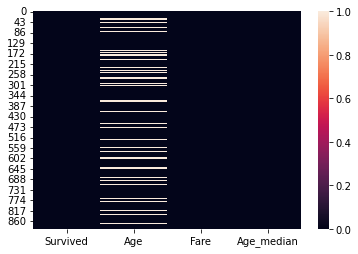

In [49]:
sns.heatmap(df.isnull())

In [53]:
print(df['Age'].std())
print(df['Age_median'].std())

14.526497332334044
13.019696550973194


In [56]:
import matplotlib.pyplot as plt
%matplotlib inline

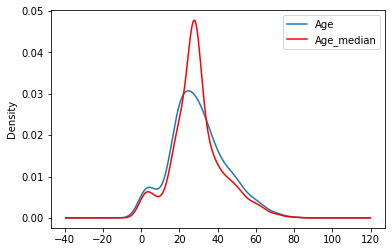

In [58]:
fig = plt.figure()
ax =  fig.add_subplot(111)
df['Age'].plot(kind = 'kde' , ax = ax)
df.Age_median.plot(kind = 'kde' , ax =ax , color = 'red')
lines , labels = ax.get_legend_handles_labels()
ax.legend(lines , labels , loc = 'best')